# Leanding Club Case Study

Imports and basic set-up

In [1]:
import warnings
from os import getcwd
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
# sns.set_style('darkgrid')
plt.style.use('ggplot')

In [3]:
PRJ_DIR = getcwd()
DATA_DIR = join(PRJ_DIR, 'data')

## Step 0: Reading data

In [4]:
df = pd.read_csv(join(DATA_DIR, 'loan.csv'))
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
data_dict = pd.read_excel(join(DATA_DIR, 'Data_Dictionary.xlsx'))
data_dict = data_dict.dropna()
data_dict.sample(5)

,LoanStatNew,Description
106,total_pymnt_inv,Payments received to date for portion of total amount funded by investors
105,total_pymnt,Payments received to date for total amount funded
54,mths_since_recent_bc,Months since most recent bankcard account opened.
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
7,avg_cur_bal,Average current balance of all accounts


## Step 1: Cleaning

### Choosing columns
There are columns with `Nan` values.

In [6]:
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


As seen above, there are columns which do not contain any values. Some of the columns contain not but few values.

In [7]:
(df.isna().sum() >= 0.5 * df.shape[0]).sum()

57

57 columns have more than 50% vlues as null. I am choosing not to use them and dropping them from analysis.

In [8]:
column_names = df.columns[df.isna().sum() <= 0.50 * df.shape[0]].tolist()
data_df = df[column_names]
del df
data_df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
19915,666970,852704,5000,5000,5000.0,36 months,10.37%,162.21,B,B3,NaN,10+ years,RENT,50000.0,Not Verified,Feb-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=666970,NaN,small_business,Inventory Financing,863xx,AZ,16.37,0,Aug-02,1,5,0,2233,82.70%,7,f,0.0,0.0,5840.076839,5840.08,4999.99,840.09,0.00,0.0,0.0,Feb-14,167.53,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
33167,472537,596728,9250,9250,9000.0,36 months,12.53%,309.57,B,B5,THUNDER FACTORY,2 years,MORTGAGE,71500.0,Not Verified,Jan-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=472537,"Borrower added on 12/28/09 > I am earning over $70k a year from my full-time position working as a Senior Associate for an Advertising Agency based in San Francisco. I also run my own internet marketing business on the side and bring in Approx. $5,000/mo. I plan on paying off this loan in less than 3 years without a problem.<br/>",debt_consolidation,Reduce Credit Card Debt,070xx,NJ,13.83,0,Mar-03,1,8,0,18463,79.20%,17,f,0.0,0.0,11163.243190,10861.53,9250.00,1897.76,15.48,0.0,0.0,Jan-13,344.55,Feb-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
21662,641021,804003,6000,6000,6000.0,36 months,6.17%,183.00,A,A3,Hudson Legal,< 1 year,RENT,66000.0,Not Verified,Dec-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=641021,NaN,debt_consolidation,CC Consolidation Loan,112xx,NY,13.60,0,Dec-95,0,14,0,7019,47.40%,38,f,0.0,0.0,6603.161390,6603.16,6000.00,588.16,15.00,0.0,0.0,Jan-14,186.47,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Another thing to check in the remaining column is the numbeor of unique values found in the each column

In [9]:
data_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are columns which contain only 1 value for all the rows. We are choosing not to use them either as they are not adding any information wrt to our target variable

In [10]:
(data_df.nunique() <= 1).sum()

9

9 columns will be additionally removed from our analysis.

In [11]:
column_names = data_df.columns[data_df.nunique() > 1]
data_df = data_df[column_names]
data_df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
2685,1033410,1262980,3600,3600,3600.0,36 months,14.27%,123.52,C,C2,JTE Enterprises Inc,10+ years,RENT,106000.0,Source Verified,Nov-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1033410,NaN,debt_consolidation,Debt consolidation,117xx,NY,2.89,0,Jun-99,2,12,0,6949,68.10%,27,0.0,0.0,3914.958701,3914.96,3600.00,314.96,0.000000,0.00,0.0000,Aug-12,3052.82,Apr-16,0.0
9134,813185,1020614,21000,14525,14250.0,60 months,10.99%,315.74,B,B3,"ABQ Health Partners, LLC",4 years,RENT,92000.0,Verified,Aug-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=813185,"Borrower added on 08/16/11 > Consolidating one last chunk of high interest revolving credit to this loan, clearing out the remainder of my debt and starting to save for home and family.<br/>",debt_consolidation,Debt Consolidation,871xx,NM,5.97,0,May-88,0,4,0,23447,47.90%,15,0.0,0.0,4488.020000,4402.85,2298.58,1477.34,0.000000,712.10,6.5100,Sep-12,315.74,Feb-13,0.0
20305,660912,845272,8400,8400,8400.0,36 months,14.91%,290.82,D,D2,NaN,10+ years,MORTGAGE,62400.0,Source Verified,Feb-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=660912,"Borrower added on 01/24/11 > I plan on using the money to have some cushion on the front end of jobs. I have a lot of work coming up and I don't want to turn work away because I can't fund the operating side. Keeping that in mind, I will budget my work and money to stay efficient. I believe I am a low risk because I pay my bills. I need that kind of a reputation to stay in business. Work is good. I have repeat customers and referrals from customers. I am a remodeling contractor with 3 decades of experience. I also do a lot of insurance claim work. I have a very diverse background.<br/>",small_business,Money to expand,554xx,MN,0.27,2,Sep-00,1,2,0,14,2%,22,0.0,0.0,3584.100000,3584.10,1758.53,851.58,29.917475,944.07,271.7186,Nov-11,290.82,Apr-12,0.0


In [12]:
pd.DataFrame([(i, data_df[i].isna().sum(),
               data_df[i].nunique(),
               data_dict[data_dict.LoanStatNew == i]['Description'].values[0])
              for i in data_df.columns],
             columns=['Column_Name', 'Num_NAs', 'Num_unique_vals', 'Description'])

,Column_Name,Num_NAs,Num_unique_vals,Description
0,id,0,39717,A unique LC assigned ID for the loan listing.
1,member_id,0,39717,A unique LC assigned Id for the borrower member.
2,loan_amnt,0,885,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,0,1041,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,0,8205,The total amount committed by investors for that loan at that point in time.
5,term,0,2,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,0,371,Interest Rate on the loan
7,installment,0,15383,The monthly payment owed by the borrower if the loan originates.
8,grade,0,7,LC assigned loan grade
9,sub_grade,0,35,LC assigned loan subgrade


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [14]:
def get_earliest_yr(x):
    x = int(x.split("-")[1])
    if 0 <= x <= 11:
        return str(2000 + x)
    return str(1900 + x)

In [15]:
data_df['term'] = data_df.term.apply(lambda x: int(x.strip().split(' ')[0]))
data_df['int_rate'] = data_df.int_rate.apply(lambda x: float(x.strip().strip('%')))

In [16]:
data_df['issue_d_month'] = data_df.issue_d.apply(lambda x: x.split('-')[0])
data_df['issue_d_year'] = data_df.issue_d.apply(lambda x: "20" + x.split('-')[1])
data_df = data_df.drop(['issue_d'], axis=1)

In [17]:
data_df['earliest_cr_line_month'] = data_df.earliest_cr_line.apply(lambda x: x.split('-')[0])
data_df['earliest_cr_line_year'] = data_df.earliest_cr_line.apply(get_earliest_yr)
data_df = data_df.drop(['earliest_cr_line'], axis=1)

## Step 2: Uni-variate Analysis

### Loan amount

In [32]:
data_df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

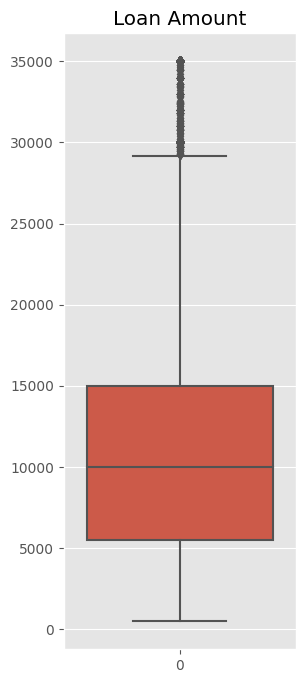

In [29]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.loan_amnt)
plt.title('Loan Amount')
plt.show()

We observe that:
- The median amount that is applied for is USD 10000
- Only 25% of the applicants have applied for amounts greater than USD 15000

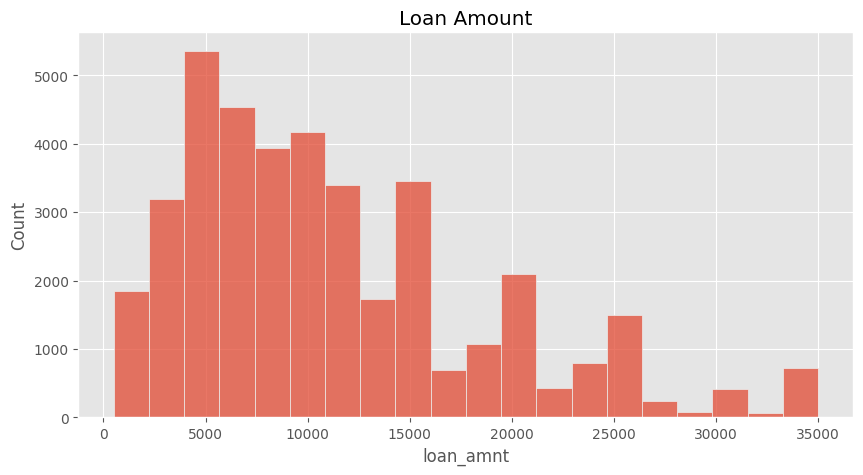

In [52]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.loan_amnt, bins=20)
plt.title('Loan Amount')
plt.show()

### Funded Amount

In [33]:
data_df.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

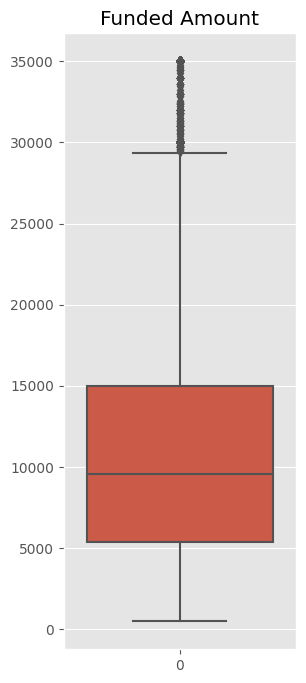

In [34]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.funded_amnt)
plt.title('Funded Amount')
plt.show()

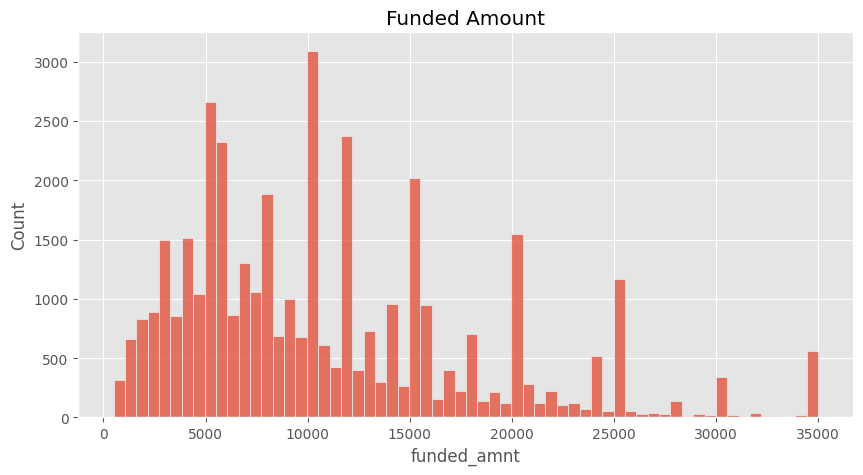

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.funded_amnt)
plt.title('Funded Amount')
plt.show()

We observe that:
- The median amount that is funded by the club is a little less USD 10000

### Amount Funded by Investor

In [35]:
data_df.funded_amnt_inv.describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

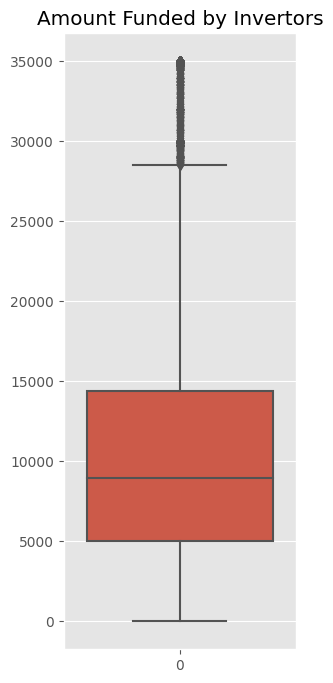

In [36]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.funded_amnt_inv)
plt.title('Amount Funded by Invertors')
plt.show()

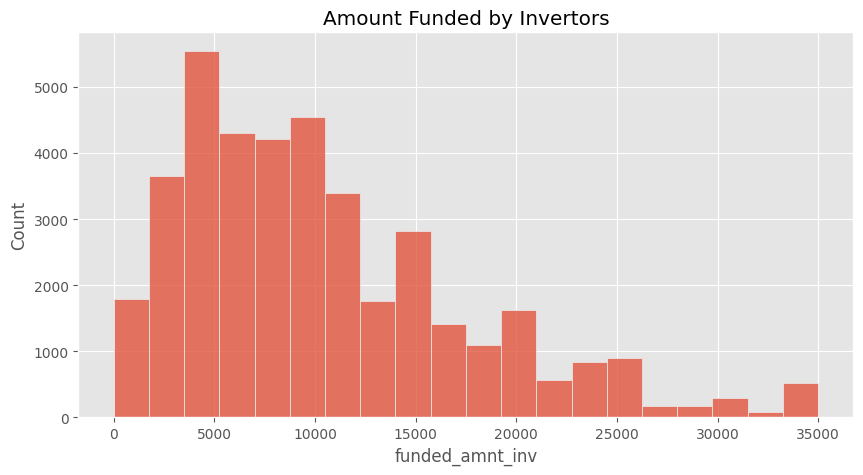

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.funded_amnt_inv, bins=20)
plt.title('Amount Funded by Invertors')
plt.show()

We observe that:
- The median amount that is funded by the investors is a approximately USD 9000

### Term of the loan

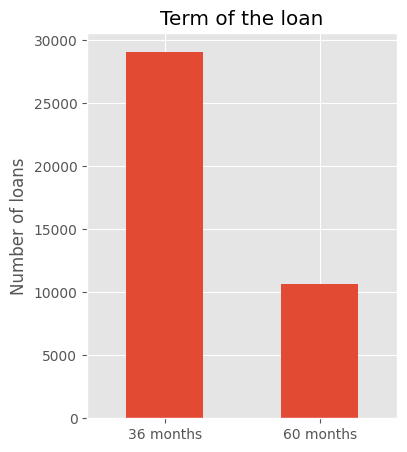

In [45]:
plt.figure(figsize=(4, 5))
data_df.term.value_counts().plot.bar()
plt.title("Term of the loan")
plt.xticks(ticks=[0 ,1], labels=['36 months', '60 months'], rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

We have loans of 2 type of terms:
- 36 months or 3 years
- 60 months or 5 years

We observe that amount of loans issued for the 36 month period are far more than those issued for 60 month period.

### Interest Rates

In [57]:
data_df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

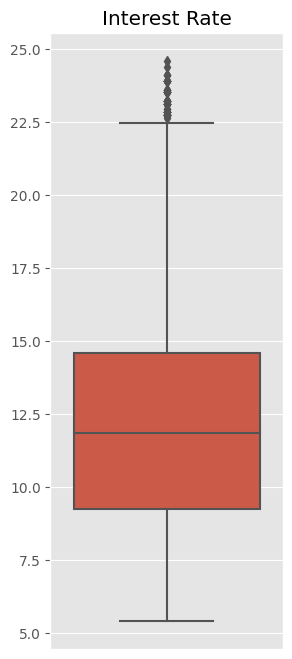

In [59]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.int_rate)
plt.title('Interest Rate')
plt.xticks(ticks=[])
plt.show()

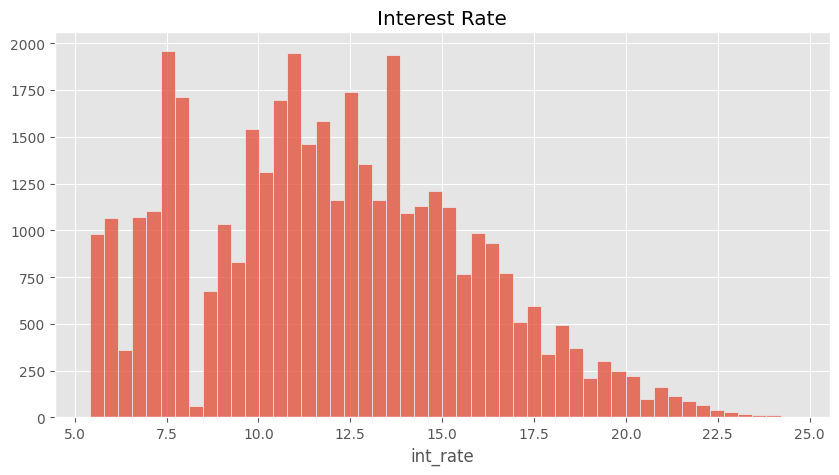

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.int_rate, bins=50)
plt.title('Interest Rate')
plt.ylabel(None)
plt.show()

We observe that:
- **More than 75%** of the loans have an interest rate less than **15%**
- **50%** of the loans have an interest rate between **9.25%** and **14.6%** 

### Installments

In [67]:
data_df.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

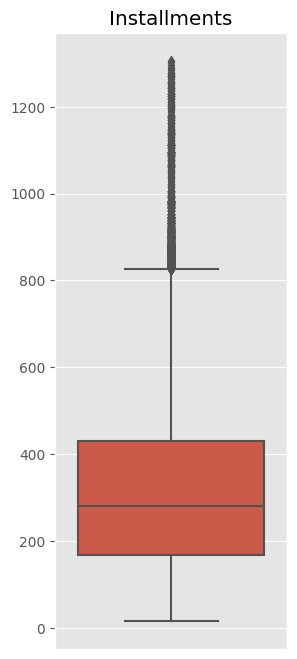

In [68]:
plt.figure(figsize=(3, 8))
sns.boxplot(data_df.installment)
plt.title('Installments')
plt.xticks(ticks=[])
plt.show()

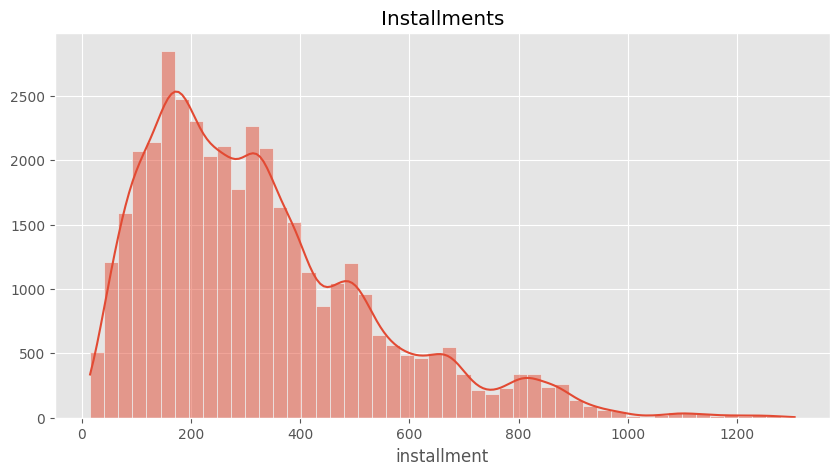

In [76]:
plt.figure(figsize=(10, 5))
sns.histplot(data_df.installment, kde=True, bins=50)
plt.title('Installments')
plt.ylabel(None)
plt.show()

We observe that:
- Median installment paid is **USD 280**
- **More than 75%** of the monthly installments are **below USD 500**

### Grade and Sub-Grade

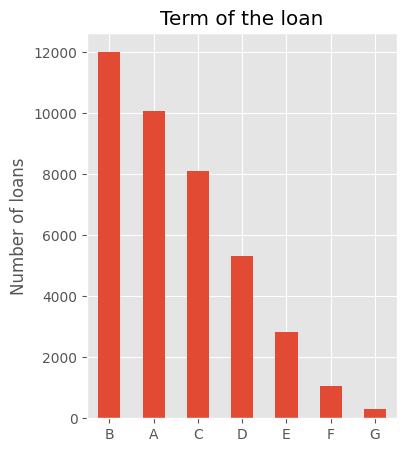

In [88]:
plt.figure(figsize=(4, 5))
data_df.grade.value_counts().plot.bar()
plt.title("Term of the loan")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

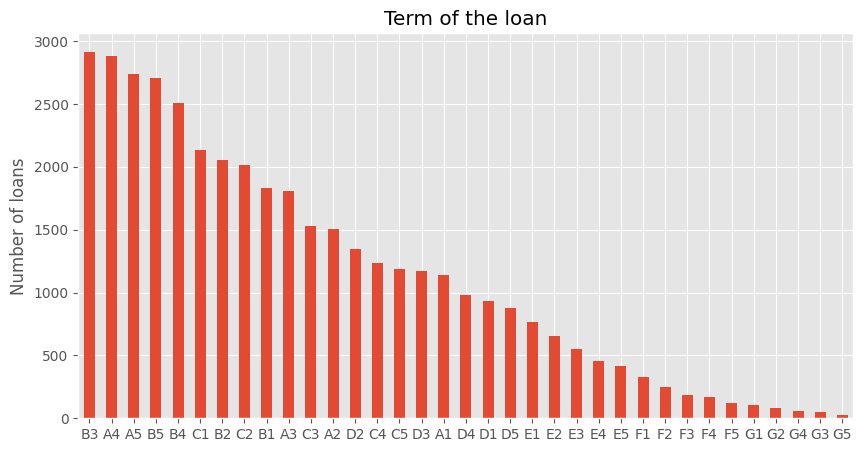

In [90]:
plt.figure(figsize=(10, 5))
data_df.sub_grade.value_counts().plot.bar()
plt.title("Term of the loan")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of loans")
plt.show()

<Axes: ylabel='grade'>

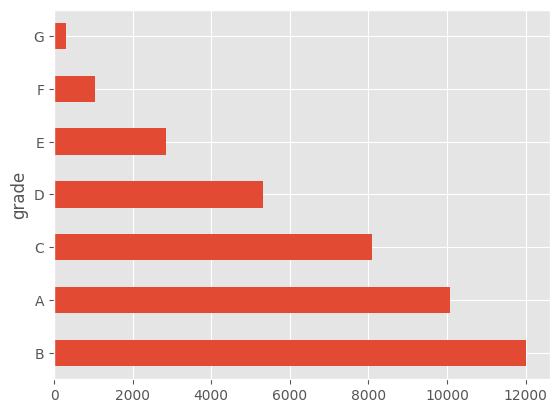

In [77]:
data_df.grade.value_counts().plot.barh()